In [3]:
import numpy as np
from FuzzyTM import FLSA_W
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

In [4]:
def filter_word_from_corpus(data, words):
    # Ensure words is a list, even if a single string is passed
    
    if isinstance(words, list):
    # Filter words from data
        filtered_data = [[token for token in row if token not in words] for row in data]
        
    return filtered_data

In [5]:
def compute_flsaw_coherence_values(input_data, num_topics_list, num_words):
    """
    Compute coherence scores for various number of topics for FLSA-W.

    Parameters:
    ----------
    input_data : List of input texts (processed content)
    num_topics_list : List of numbers of topics to evaluate
    num_words : Number of words to represent topics
    passes : Number of passes for model training

    Returns:
    -------
    coherence_values : Coherence values for each number of topics
    """
    coherence_values = []

    for num_topics in num_topics_list:
        flsaW = FLSA_W(input_file=input_data, num_topics=num_topics, num_words=num_words)
        pwgt, ptgd = flsaW.get_matrices()  # Train the model
        coherence_score = flsaW.get_coherence_score()  # Get the coherence score
        coherence_values.append(coherence_score)

    return coherence_values

In [ ]:
def compute_flsaw_interpretability_values(input_data, num_topics_list, num_words):
    """
    Compute coherence scores for various number of topics for FLSA-W.

    Parameters:
    ----------
    input_data : List of input texts (processed content)
    num_topics_list : List of numbers of topics to evaluate
    num_words : Number of words to represent topics
    passes : Number of passes for model training

    Returns:
    -------
    coherence_values : Coherence values for each number of topics
    """
    coherence_values = []

    for num_topics in num_topics_list:
        flsaW = FLSA_W(input_file=input_data, num_topics=num_topics, num_words=num_words)
        pwgt, ptgd = flsaW.get_matrices()  # Train the model
        coherence_score = flsaW.get_coherence_score()  # Get the coherence score
        coherence_values.append(coherence_score)

    return coherence_values

In [11]:
def compute_flsaw_interpretability_values(input_data, num_topics_list, num_words):
    """
    Compute interpretability scores for various number of topics for FLSA-W.

    Parameters:
    ----------
    input_data : List of input texts (processed content)
    num_topics_list : List of numbers of topics to evaluate
    num_words : Number of words to represent topics

    Returns:
    -------
    interpretability_values : Interpretability values for each number of topics
    """
    interpretability_values = []

    for num_topics in num_topics_list:
        flsaW = FLSA_W(input_file=input_data, num_topics=num_topics, num_words=num_words)
        pwgt, ptgd = flsaW.get_matrices()  # Train the model
        interpretability_score = flsaW.get_interpretability_score()  # Get the interpretability score
        interpretability_values.append(interpretability_score)

    return interpretability_values


In [6]:
def filter_and_compare_coherence(word_list, max_iterations, file_path, num_topics):
    # Initialize an empty list to store results
    results = []
    # Load the data
    processed_df =  pd.read_csv(file_path)

    # Extract processed content as a list of lists (tokenized documents)
    processed_content = [content.split() for content in processed_df['processed_content']]
    
    for word in word_list[:max_iterations]:  # Limit iterations to max_iterations
        # Filter the current word from the processed content
        filtered_content = filter_word_from_corpus(processed_content, [word])
        
        # Train the FLSA-W model
        flsaW = FLSA_W(input_file=filtered_content, num_topics=num_topics, num_words=10)
        pwgt, ptgd = flsaW.get_matrices()  # Train the model
        
        # Get the coherence score
        coherence_score = flsaW.get_coherence_score()
        
        # Store the word and its corresponding coherence score
        results.append((word, coherence_score))
        
        # Print the topics and coherence score for this iteration
        print(f"Removed word: {word}")
        print(f"Coherence score: {coherence_score}\n")
        
    # Return the results for further analysis if needed
    return results

In [7]:
def find_most_common_words(file_path, top_n=10):
    # Load the processed data
    processed_df = pd.read_csv(file_path)
    
    # Extract processed content as a list of lists (tokenized documents)
    processed_content = [content.split() for content in processed_df['processed_content']]
    
    # Flatten the list of documents into a single list of words
    all_words = [word for doc in processed_content for word in doc]
    
    # Count the frequency of each word
    word_freq = Counter(all_words)
    
    # Get the most common words
    most_common = word_freq.most_common(top_n)
    
    return most_common

In [8]:

# Load the data
processed_df = pd.read_csv('../data/flsaw_processed_content.csv')

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

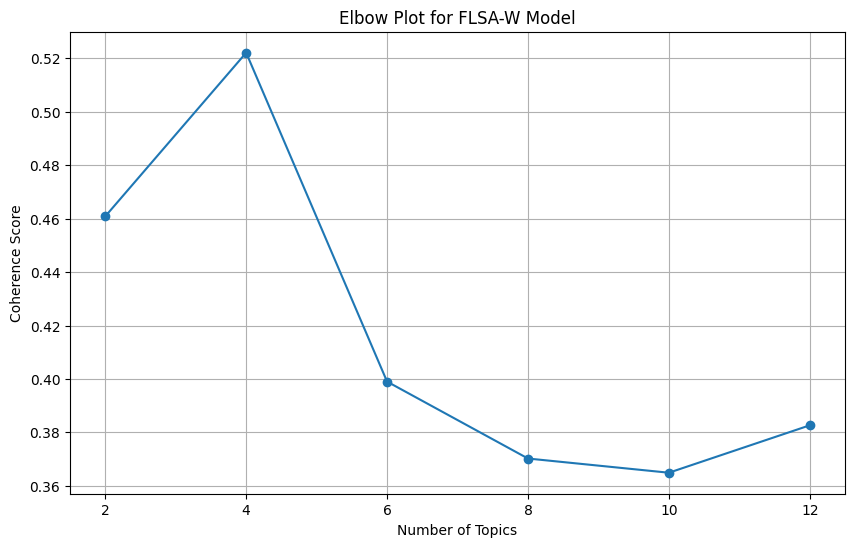

In [7]:
# Define the range of topics to evaluate
num_topics_list = range(2, 14, 2) 
num_words = 10  # Number of words to display per topic

# Compute coherence values for the defined number of topics
coherence_scores = compute_flsaw_coherence_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

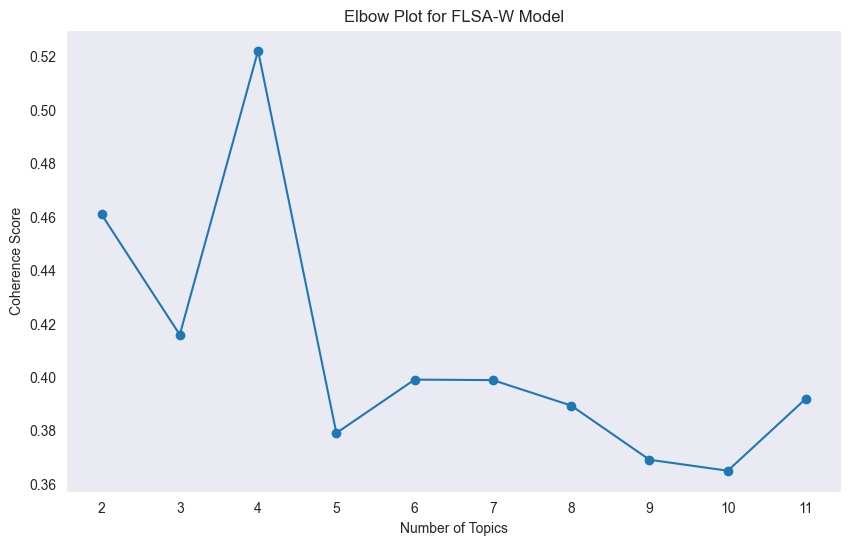

In [9]:
# Define the range of topics to evaluate
num_topics_list = range(2, 12, 1) 
num_words = 10  # Number of words to display per topic

# Compute coherence values for the defined number of topics
coherence_scores = compute_flsaw_coherence_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

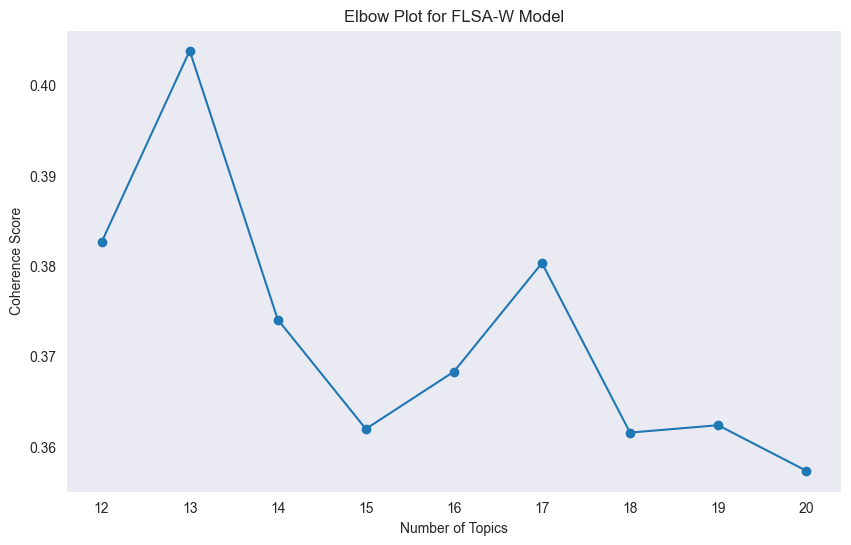

In [10]:
# Define the range of topics to evaluate
num_topics_list = range(12, 21, 1) 
num_words = 10  # Number of words to display per topic

# Compute coherence values for the defined number of topics
coherence_scores = compute_flsaw_coherence_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

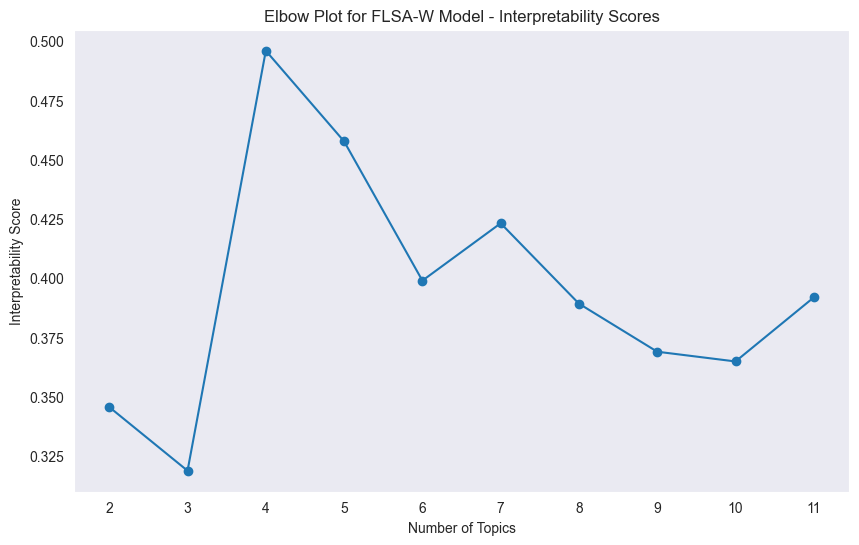

In [12]:
# Define the range of topics to evaluate
num_topics_list = range(2, 12, 1) 
num_words = 10  # Number of words to display per topic

# Compute interpretability values for the defined number of topics
interpretability_scores = compute_flsaw_interpretability_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, interpretability_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model - Interpretability Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Interpretability Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

In [9]:
flsaW = FLSA_W(
input_file = processed_content,
num_topics=4,
num_words=10,
)

flsaW.get_vocabulary_size()

pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL

print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)

print(f'Coherence score: {flsaW.get_coherence_score()}')
print(f'Diversity score: {flsaW.get_diversity_score()}')
print(f'Interpretability score: {flsaW.get_interpretability_score()}')

[(0, '0.0011*"nvda" + 0.0011*"corporation" + 0.0011*"nvidia" + 0.0011*"inc" + 0.001*"nasdaq" + 0.001*"investing" + 0.001*"com" + 0.001*"shares" + 0.0009*"rank" + 0.0009*"intc"'), (1, '0.0083*"book" + 0.0071*"evolution" + 0.0071*"books" + 0.0068*"science" + 0.0067*"richard" + 0.0061*"modern" + 0.0055*"certainty" + 0.0053*"professor" + 0.0049*"mind" + 0.0041*"theory"'), (2, '0.0004*"gmt" + 0.0004*"uncover" + 0.0003*"nasdaq" + 0.0003*"ounce" + 0.0003*"esp" + 0.0003*"unchanged" + 0.0003*"philadelphia" + 0.0003*"outnumbered" + 0.0003*"brent" + 0.0003*"advancing"'), (3, '0.0002*"nasdaq" + 0.0002*"premarket" + 0.0002*"also" + 0.0002*"market" + 0.0002*"troy" + 0.0002*"company" + 0.0002*"new" + 0.0002*"stocks" + 0.0002*"one" + 0.0002*"time"')]
['nvda', 'corporation', 'nvidia', 'inc', 'nasdaq', 'investing', 'com', 'shares', 'rank', 'intc']
['book', 'evolution', 'books', 'science', 'richard', 'modern', 'certainty', 'professor', 'mind', 'theory']
['gmt', 'uncover', 'nasdaq', 'ounce', 'esp', 'uncha

[['nvda', 'corporation', 'nvidia', 'inc', 'nasdaq', 'investing', 'com', 'shares', 'rank', 'intc'], ['book', 'evolution', 'books', 'science', 'richard', 'modern', 'certainty', 'professor', 'mind', 'theory'], ['gmt', 'uncover', 'nasdaq', 'ounce', 'esp', 'unchanged', 'philadelphia', 'outnumbered', 'brent', 'advancing'], ['nasdaq', 'premarket', 'also', 'market', 'troy', 'company', 'new', 'stocks', 'one', 'time']]


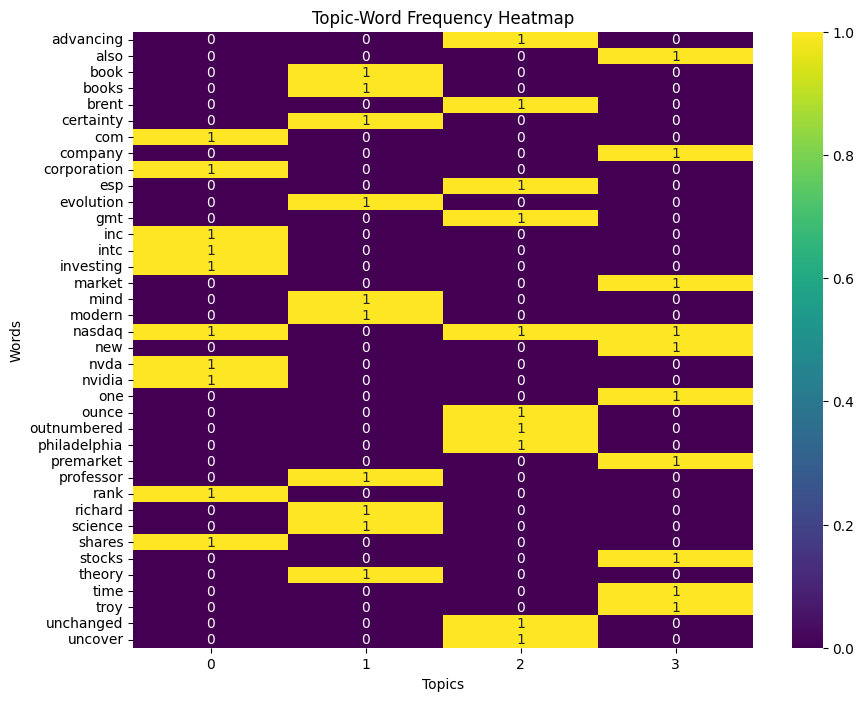

In [17]:
# Get the topics from the FLSA-W model
topics = flsaW.show_topics(representation='words')

# Print the topics to understand the structure (for debugging)
print(topics)

# Create a DataFrame from the topics
data = []

# Assuming `topics` is a list of lists where each sublist contains words for that topic
for topic_index, words in enumerate(topics):  # Use enumerate to get the topic index
    for word in words:
        data.append((topic_index, word))  # Append the topic index and the word

# Convert the list into a DataFrame
df = pd.DataFrame(data, columns=['Topic', 'Word'])

# Calculate the frequency of each word in each topic (if needed, otherwise use 1)
df['Frequency'] = 1

# Create a pivot table for heatmap
pivot_table = df.pivot_table(index='Word', columns='Topic', values='Frequency', fill_value=0)

# Create a heatmap to visualize the relationship between topics and words
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f")
plt.title("Topic-Word Frequency Heatmap")
plt.xlabel("Topics")
plt.ylabel("Words")
plt.show()


In [12]:
def create_cooccurrence_matrix(processed_texts, min_docs=100):
    cooccurrence = defaultdict(lambda: defaultdict(int))
    word_document_count = defaultdict(int)

    # Count word pairs and document frequency
    for tokens in processed_texts:
        unique_tokens = set(tokens)  # Get unique words in the document
        for word in unique_tokens:
            word_document_count[word] += 1  # Count in how many documents the word appears
            for co_word in tokens:
                if word != co_word:
                    cooccurrence[word][co_word] += 1

    # Filter words that appear in at least `min_docs` documents
    filtered_cooccurrence = {word: {co_word: count for co_word, count in co_words.items()}
                              for word, co_words in cooccurrence.items() 
                              if word_document_count[word] >= min_docs}

    return filtered_cooccurrence

def save_cooccurrence_to_file(cooccurrence, filename):
    with open(filename, 'w') as f:
        for word, co_words in cooccurrence.items():
            for co_word, freq in co_words.items():
                f.write(f"{word}\t{co_word}\t{freq}\n")


df = pd.read_csv('../data/flsaw_processed_content.csv')  


# Extract processed content as a list of lists (tokenized documents)
processed_texts = [content.split() for content in processed_df['processed_content']]


# Create co-occurrence matrix
cooccurrence_matrix = create_cooccurrence_matrix(processed_texts, min_docs=100)

# Save to a tab-separated file
output_file = '../data/cooccurrence_matrix.tsv' 
save_cooccurrence_to_file(cooccurrence_matrix, output_file)

print(f"Co-occurrence matrix saved to {output_file}.")

KeyboardInterrupt: 

In [12]:
file_path = '../data/flsaw_processed_content.csv'
top_n = 10
common_words = find_most_common_words(file_path, top_n)

# Print the most common words
print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most Common Words:
nasdaq: 14865
year: 13875
zacks: 11525
company: 11355
earnings: 9907
nvidia: 8932
stocks: 8380
market: 8254
quarter: 7798
growth: 7348


# It is very interesting that removing words does not improve the coherence score. More popular words like 'Year' and 'nasdaq' which seem to not play a role even significantly lower the coherence score.

In [13]:
max_iterations = len(common_words)  # Set max iterations
coherence_results = filter_and_compare_coherence(common_words, max_iterations)


best_word = max(coherence_results, key=lambda x: x[1])
print(f"Best word to remove for coherence improvement: {best_word[0]} with coherence score: {best_word[1]}")

Removed word: ('nasdaq', 14865)
Coherence score: 0.36057155035201327
Removed word: ('year', 13875)
Coherence score: 0.36057155035201316
Removed word: ('zacks', 11525)
Coherence score: 0.5221179806808217
Removed word: ('company', 11355)
Coherence score: 0.5221179806808217
Removed word: ('earnings', 9907)
Coherence score: 0.5221179806808218
Removed word: ('nvidia', 8932)
Coherence score: 0.5221179806808218
Removed word: ('stocks', 8380)
Coherence score: 0.5221179806808217
Removed word: ('market', 8254)
Coherence score: 0.5221179806808218
Removed word: ('quarter', 7798)
Coherence score: 0.5221179806808217
Removed word: ('growth', 7348)
Coherence score: 0.5221179806808217

Best word to remove for coherence improvement: ('earnings', 9907) with coherence score: 0.5221179806808218


# We are going to introduce stemming and lemmatization and see how it affects the coherence score.

In [29]:
file_path = '../data/flsaw_processed_content_lemmatised.csv'
top_n = 10
common_words = find_most_common_words(file_path, top_n)

# Print the most common words
print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

Most Common Words:
year: 16086
company: 15457
stock: 15450
nasdaq: 14865
zacks: 11525
market: 10486
earnings: 9907
nvidia: 8932
quarter: 8711
share: 8211


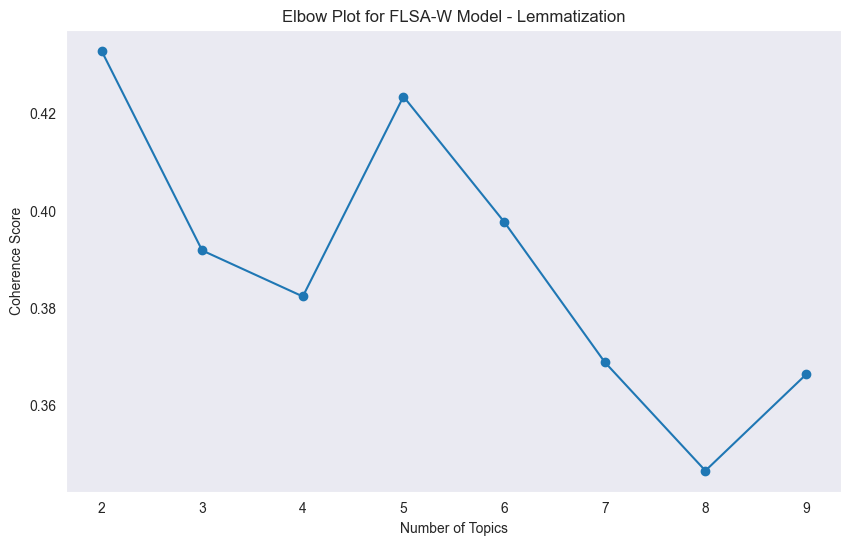

In [30]:
# Load the data
processed_df =  pd.read_csv(file_path)

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

# Define the range of topics to evaluate
num_topics_list = range(2, 10, 1)  
num_words = 10  # Number of words to display per topic

# Compute coherence values for the defined number of topics
coherence_scores = compute_flsaw_coherence_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model - Lemmatization')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

In [37]:
max_iterations = len(common_words)  # Set max iterations
num_topics = 5
coherence_results = filter_and_compare_coherence(common_words, max_iterations,file_path,num_topics)


best_word = max(coherence_results, key=lambda x: x[1])
print(f"Best word to remove for coherence improvement: {best_word[0]} with coherence score: {best_word[1]}")

Removed word: ('year', 16086)
Coherence score: 0.3792432625092587
Removed word: ('compani', 15457)
Coherence score: 0.37924326250925866
Removed word: ('stock', 15457)
Coherence score: 0.37924326250925866
Removed word: ('nasdaq', 14865)
Coherence score: 0.3792432625092587
Removed word: ('zack', 11545)
Coherence score: 0.3792432625092587
Removed word: ('market', 10766)
Coherence score: 0.37924326250925877
Removed word: ('earn', 10136)
Coherence score: 0.3792432625092587
Removed word: ('nvidia', 8932)
Coherence score: 0.37924326250925866
Removed word: ('quarter', 8711)
Coherence score: 0.37924326250925877
Removed word: ('share', 8360)
Coherence score: 0.3792432625092587

Best word to remove for coherence improvement: ('market', 10766) with coherence score: 0.37924326250925877


In [17]:
max_iterations = len(common_words)  # Set max iterations
num_topics = 4
coherence_results = filter_and_compare_coherence(common_words, max_iterations,file_path,num_topics)


best_word = max(coherence_results, key=lambda x: x[1])
print(f"Best word to remove for coherence improvement: {best_word[0]} with coherence score: {best_word[1]}")

Removed word: ('year', 16086)
Coherence score: 0.38236900102203353
Removed word: ('company', 15457)
Coherence score: 0.3823690010220334
Removed word: ('stock', 15450)
Coherence score: 0.38236900102203353
Removed word: ('nasdaq', 14865)
Coherence score: 0.5125391347487183
Removed word: ('zacks', 11525)
Coherence score: 0.3823690010220334
Removed word: ('market', 10486)
Coherence score: 0.5125391347487183
Removed word: ('earnings', 9907)
Coherence score: 0.5125391347487183
Removed word: ('nvidia', 8932)
Coherence score: 0.5125391347487183
Removed word: ('quarter', 8711)
Coherence score: 0.3823690010220335
Removed word: ('share', 8211)
Coherence score: 0.5125391347487183

Best word to remove for coherence improvement: ('nasdaq', 14865) with coherence score: 0.5125391347487183


In [31]:
file_path = '../data/flsaw_processed_content_stemming.csv'
top_n = 10
common_words = find_most_common_words(file_path, top_n)

# Print the most common words
print("Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

Most Common Words:
year: 16086
compani: 15457
stock: 15457
nasdaq: 14865
zack: 11545
market: 10766
earn: 10136
nvidia: 8932
quarter: 8711
share: 8360


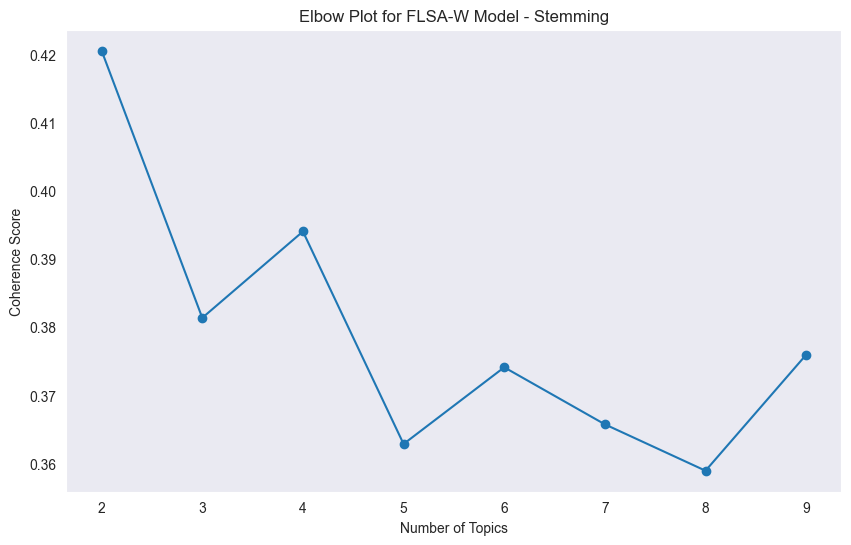

In [32]:
# Load the data
processed_df =  pd.read_csv(file_path)

# Extract processed content as a list of lists (tokenized documents)
processed_content = [content.split() for content in processed_df['processed_content']]

# Define the range of topics to evaluate
num_topics_list = range(2, 10, 1) 
num_words = 10  # Number of words to display per topic

# Compute coherence values for the defined number of topics
coherence_scores = compute_flsaw_coherence_values(processed_content, num_topics_list, num_words)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Elbow Plot for FLSA-W Model - Stemming')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()

In [19]:
max_iterations = len(common_words)  # Set max iterations
coherence_results = filter_and_compare_coherence(common_words, max_iterations,file_path)


best_word = max(coherence_results, key=lambda x: x[1])
print(f"Best word to remove for coherence improvement: {best_word[0]} with coherence score: {best_word[1]}")

Removed word: ('year', 16086)
Coherence score: 0.3940304687740894
Removed word: ('compani', 15457)
Coherence score: 0.3940304687740894
Removed word: ('stock', 15457)
Coherence score: 0.3940304687740894
Removed word: ('nasdaq', 14865)
Coherence score: 0.3940304687740894
Removed word: ('zack', 11545)
Coherence score: 0.3940304687740894
Removed word: ('market', 10766)
Coherence score: 0.3940304687740894
Removed word: ('earn', 10136)
Coherence score: 0.3940304687740894
Removed word: ('nvidia', 8932)
Coherence score: 0.39403046877408937
Removed word: ('quarter', 8711)
Coherence score: 0.3940304687740894
Removed word: ('share', 8360)
Coherence score: 0.3940304687740894

Best word to remove for coherence improvement: ('year', 16086) with coherence score: 0.3940304687740894
